In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2  * np.random.randn(100, 1) # (100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

[0, 2, 0, 15]

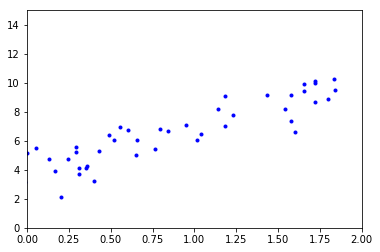

In [3]:
plt.plot(X, y, '.b')
plt.axis([0, 2, 0, 15])
# plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
X_b[:5]

array([[ 1.        , -1.10819732],
       [ 1.        , -2.53783707],
       [ 1.        , -0.15240277],
       [ 1.        , -1.01858335],
       [ 1.        ,  0.30960546]])

In [7]:
X_b.shape

(100, 2)

# 해석적 방법

- 정규방정식: $\hat{\theta} = (X^T * X)^{-1}*X^T*y$

In [8]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.98015039],
       [3.05304523]])

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [39]:
# 편향 추가
X_new_b = np.c_[np.ones(X_new.shape),X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [40]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.88818436],
       [9.98585662]])

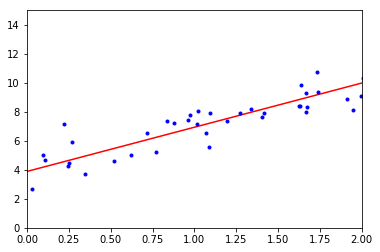

In [41]:
plt.plot(X_new, y_predict, 'r')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

# 다항회귀

In [52]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

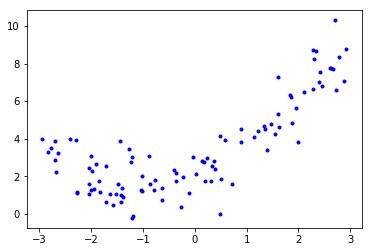

In [53]:
plt.plot(X, y, '.b')

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [59]:
X_poly = poly_features.fit_transform(X)

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[2.06205369]
[[0.99360436 0.48890622]]


In [76]:
X_new = np.linspace(-3, 3, 50).reshape(50, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

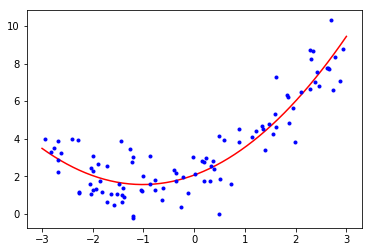

In [77]:
plt.plot(X_new, y_new, 'r')
plt.plot(X, y, '.b')

경사하강법

In [29]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # x0 = 1 추가

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]


In [30]:
weight_path_bgd = []
def plot_gradient_descent(weight, eta, weight_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(weight)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - eta * gradients
        if weight_path is not None:
            weight_path.append(weight)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

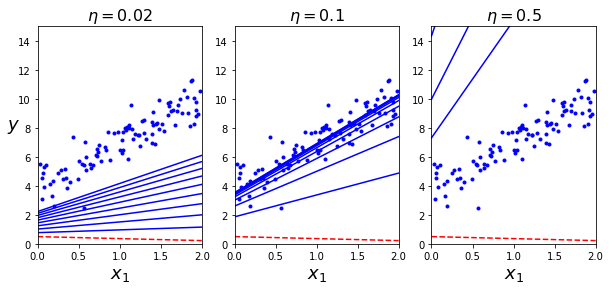

In [31]:
np.random.seed(42)
weight = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(weight, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(weight, eta=0.1, weight_path=weight_path_bgd)
plt.subplot(133); plot_gradient_descent(weight, eta=0.5)
plt.show()